# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [49]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine --user

Running this project require the following imports 

In [9]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [10]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



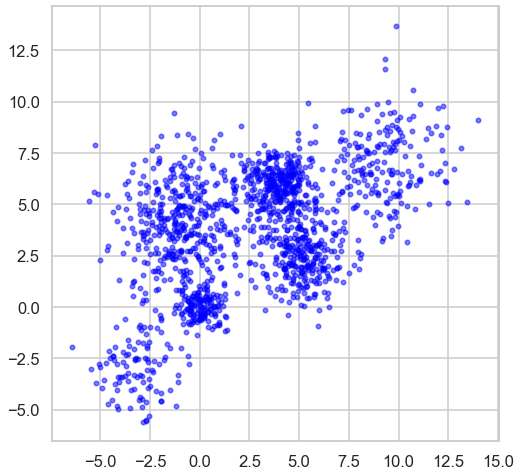

In [11]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

# Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

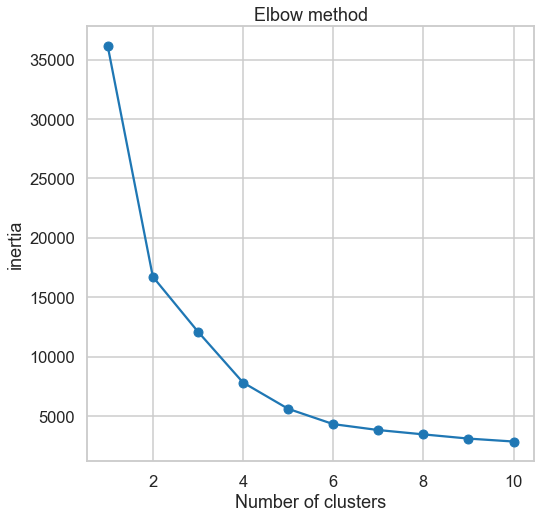

In [12]:
#This represents the elbow method, which is a method used to find the optimum number of clusters. As seen in the inertia graph, the optimum number of clusters is K=2. 
inertias = []


for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Multi_blob_Data)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()


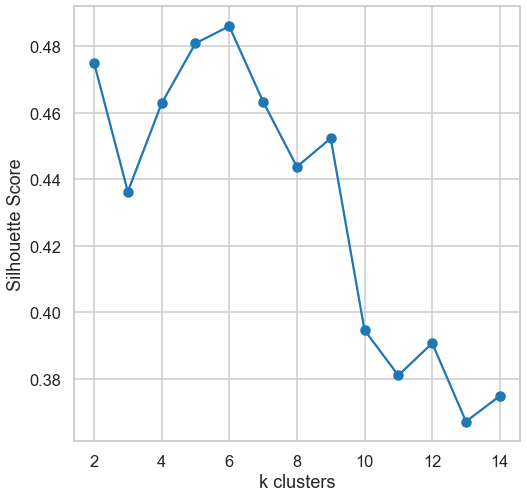

In [29]:
#this represents the silhouette method 
# silhouette score
def silhouette(Multi_blob_Data):
    silhouette_score1 = []
    clusters = list(range(2,15))
    for num_clusters in clusters:
        kmeans = KMeans(n_clusters=num_clusters)
        cluster= kmeans.fit(Multi_blob_Data)
        silhouette_score1.append(silhouette_score(Multi_blob_Data,kmeans.labels_,metric='euclidean'))

    plt.plot(clusters,silhouette_score1)
    plt.scatter(clusters,silhouette_score1)
    plt.xlabel('k clusters')
    plt.ylabel('Silhouette Score')
    
silhouette(Multi_blob_Data)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

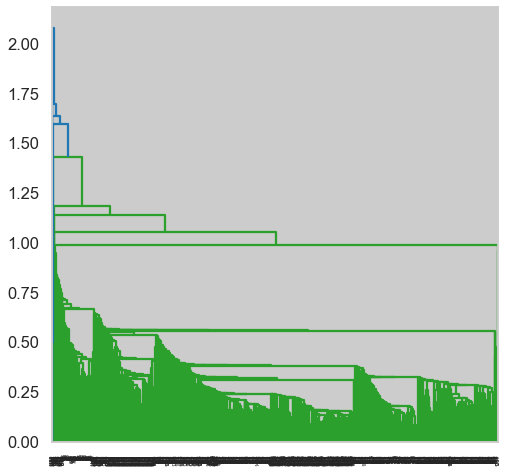

silhouette_score_euclidean=0.39501266163348286


In [13]:
#metric=euclidean
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

def euclidean_method(Multi_blob_Data, link):
    model = AgglomerativeClustering(distance_threshold=0,n_clusters=None, affinity='euclidean', linkage=link)
    model.fit(Multi_blob_Data)
    labels = model.labels_
    dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method=link))
    plt.show()
    score = silhouette_score(Multi_blob_Data, kmeans.labels_, metric='euclidean')
    print(f'silhouette_score_euclidean={score}')
    
euclidean_method(Multi_blob_Data, 'single')

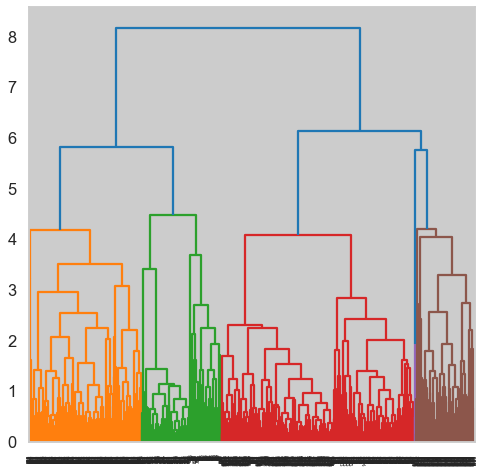

silhouette_score_euclidean=0.39501266163348286


In [14]:
euclidean_method(Multi_blob_Data, 'average')

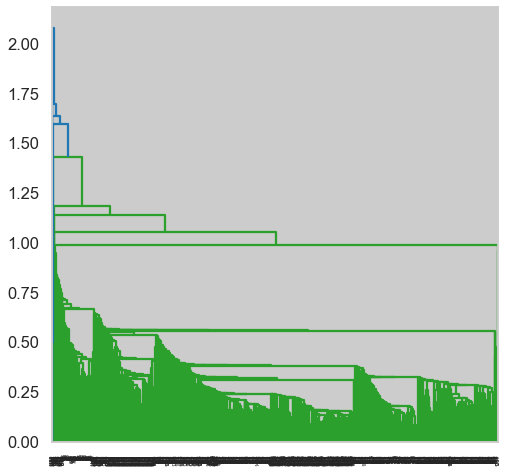

silhouette_score_cosine=0.10255439476007218


In [15]:
#method=cosine
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

def cosine_method(Multi_blob_Data, link):
    model = AgglomerativeClustering(distance_threshold=0,n_clusters=None, affinity='cosine', linkage=link)
    model.fit(Multi_blob_Data)
    labels = model.labels_
    dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method=link))
    plt.show()
    score = silhouette_score(Multi_blob_Data, kmeans.labels_, metric='cosine')
    print(f'silhouette_score_cosine={score}')
    
cosine_method(Multi_blob_Data, 'single')

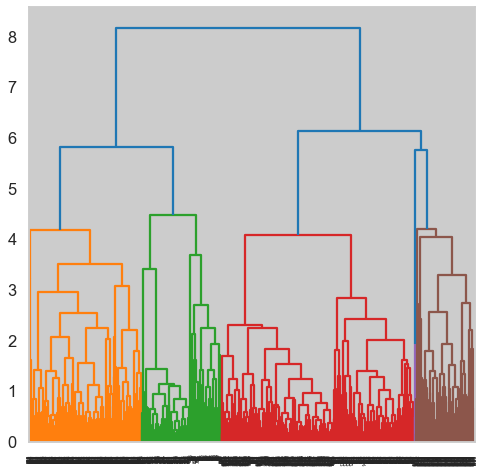

silhouette_score_cosine=0.10245499460312811


In [38]:
cosine_method(Multi_blob_Data, 'average')

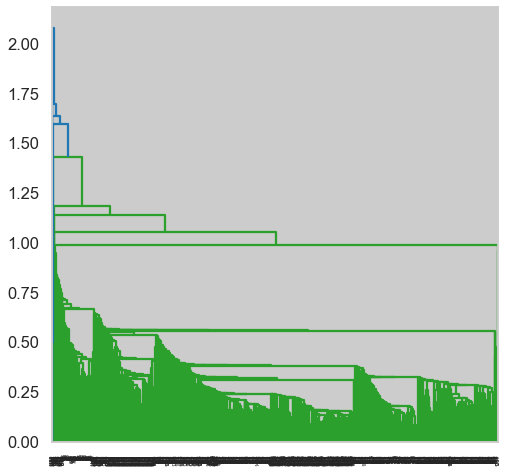

silhouette_score_manhattan=0.3989494473469844


In [16]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

def manhattan_method(Multi_blob_Data, link):
    model = AgglomerativeClustering(distance_threshold=0,n_clusters=None, affinity='manhattan', linkage=link)
    model.fit(Multi_blob_Data)
    labels = model.labels_
    dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method=link))
    plt.show()
    score = silhouette_score(Multi_blob_Data, kmeans.labels_, metric='manhattan')
    print(f'silhouette_score_manhattan={score}')
    
manhattan_method(Multi_blob_Data, 'single')

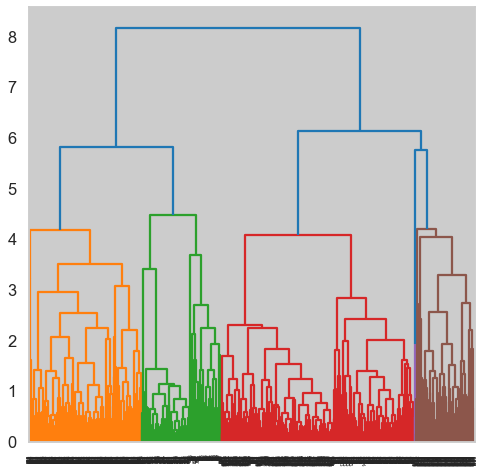

silhouette_score_manhattan=0.39518212552233106


In [40]:
manhattan_method(Multi_blob_Data, 'average')

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

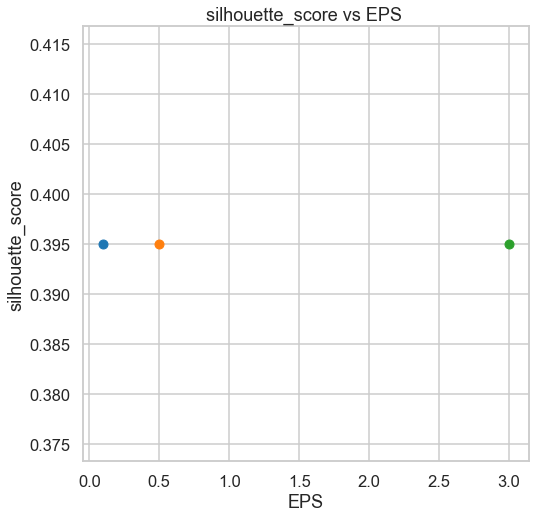

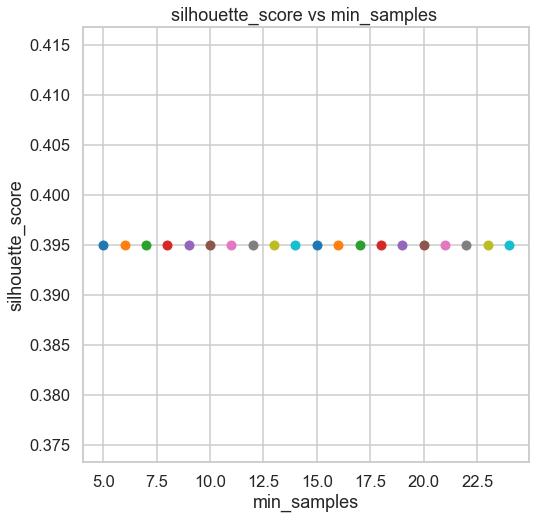

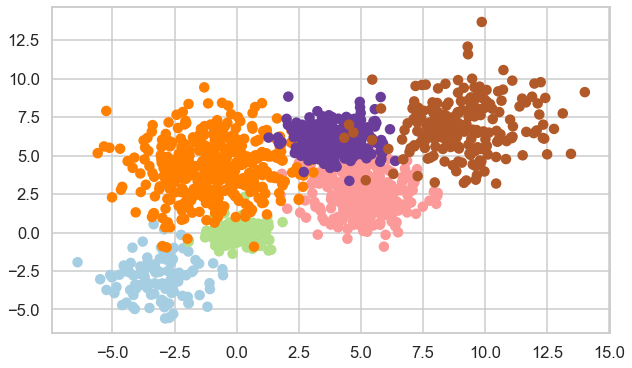

In [23]:
min_samples=20
db = DBSCAN(eps=0.2, min_samples=20)
db.fit(Multi_blob_Data)
score = silhouette_score(Multi_blob_Data, kmeans.labels_)
eps = [0.1, 0.5, 3]
for eps in eps:
    plt.plot(eps, score, marker='o')
    plt.title('silhouette_score vs EPS ')
    plt.xlabel('EPS')
    plt.ylabel('silhouette_score')
plt.show()
for min_samples in range(5,25,1):
    plt.plot(min_samples, score, marker='o')
    plt.title('silhouette_score vs min_samples ')
    plt.xlabel('min_samples')
    plt.ylabel('silhouette_score')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=y, cmap='Paired')

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [41]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [42]:
#kmeans clustering
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(iris_data)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

TypeError: float() argument must be a string or a number, not 'Bunch'

In [ ]:
#Hierarchal Clustering

In [ ]:
#DBscan

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [25]:
df = pd.read_csv('Customer data.csv')

In [26]:
display(df)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


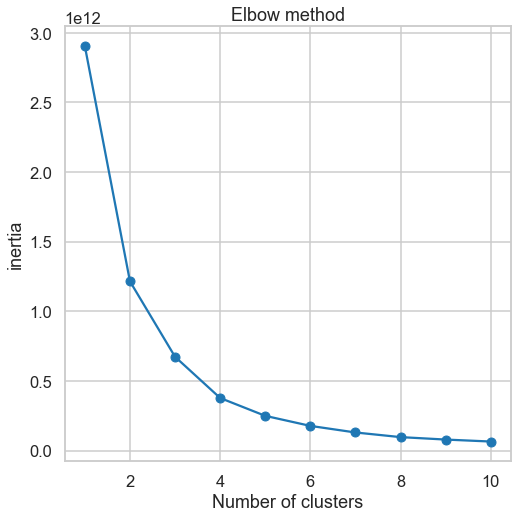

In [27]:
#kmeans clustering

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df.values)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

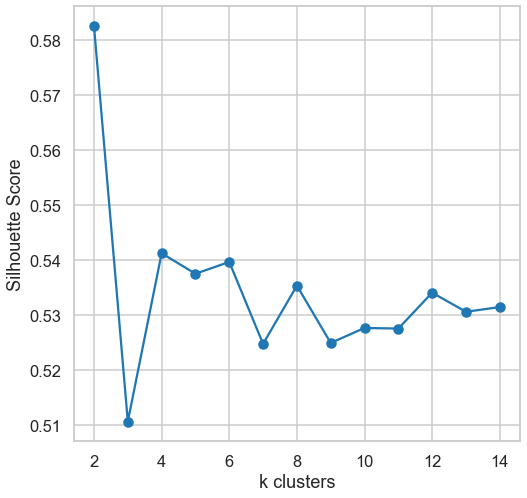

In [30]:
silhouette(df.values)

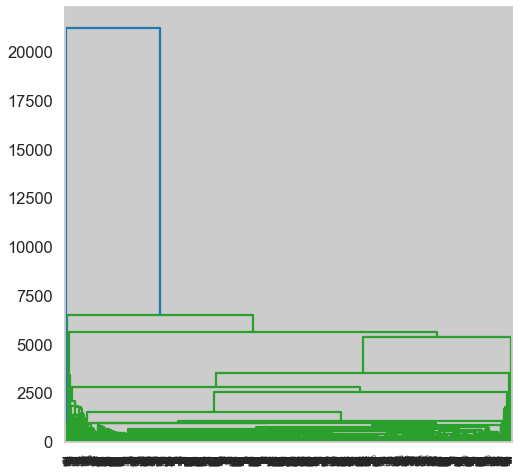

silhouette_score_euclidean=0.5274593598471033


In [31]:
#Hierarchal Clustering
euclidean_method(df.values, 'single')

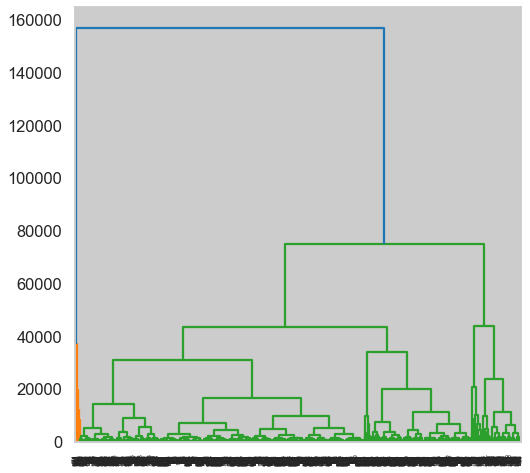

silhouette_score_euclidean=0.5274593598471033


In [32]:
euclidean_method(df.values, 'average')

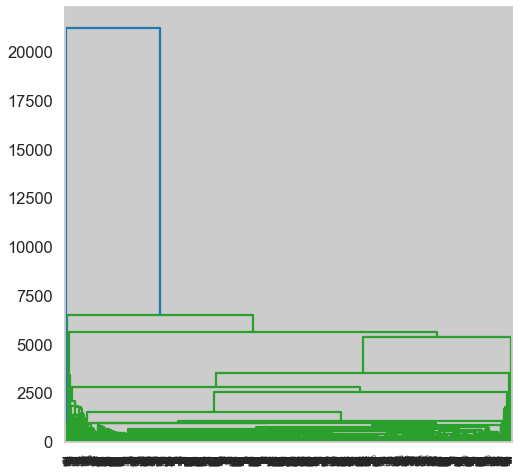

silhouette_score_cosine=0.6896316595094723


In [33]:
cosine_method(df.values, 'single')

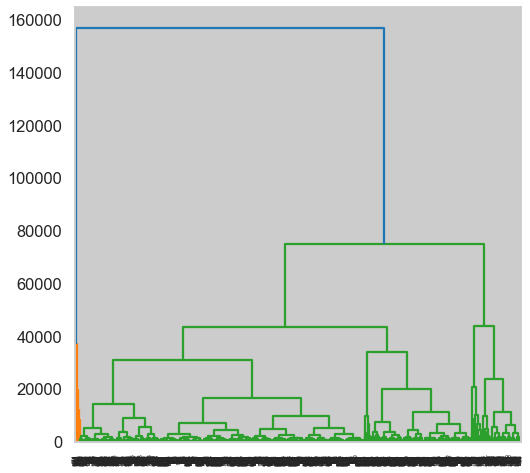

silhouette_score_cosine=0.6896316595094723


In [34]:
cosine_method(df.values, 'average')

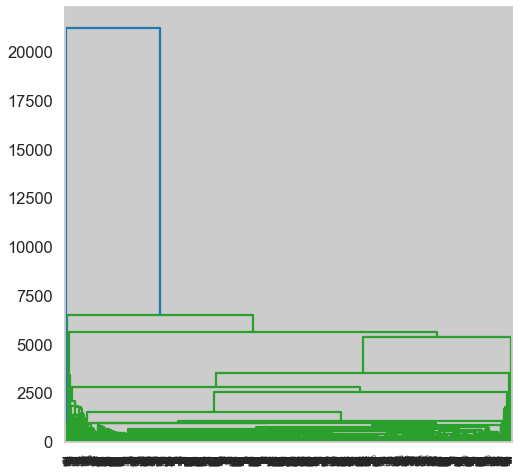

silhouette_score_manhattan=0.5100521951304631


In [35]:
manhattan_method(df.values, 'single')

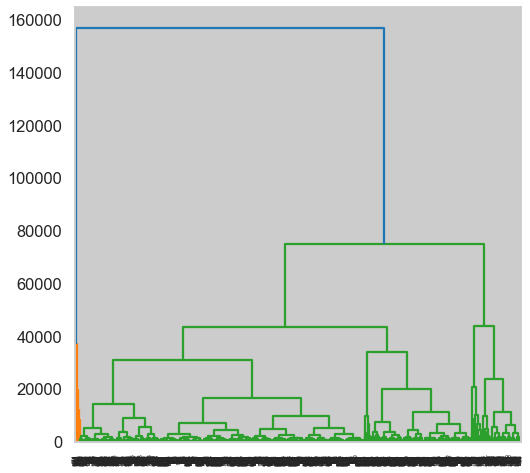

silhouette_score_manhattan=0.5100521951304631


In [36]:
manhattan_method(df.values, 'average')

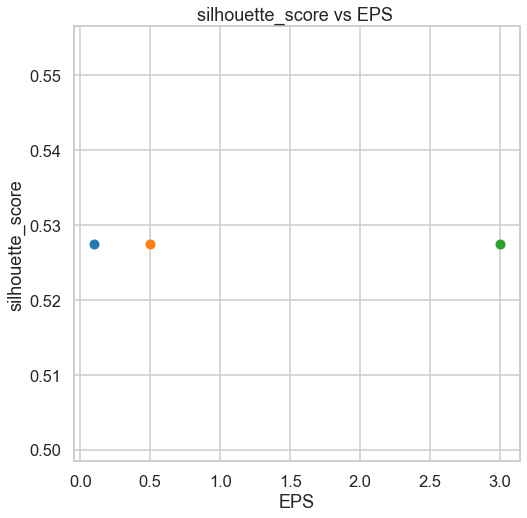

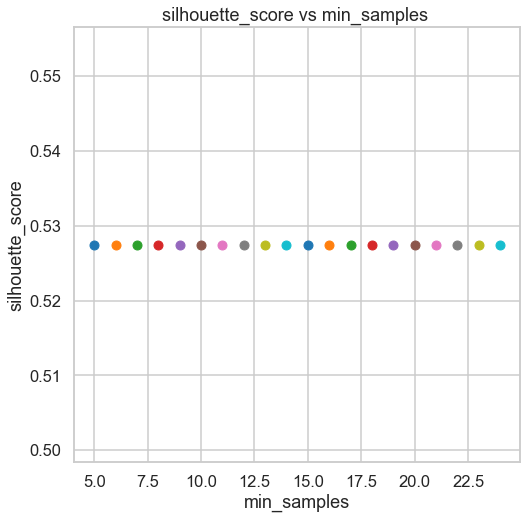

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 720x432 with 0 Axes>

In [39]:
#DBscan
min_samples=20
db = DBSCAN(eps=0.2, min_samples=20)
db.fit(df.values)
score = silhouette_score(df.values, kmeans.labels_)
eps = [0.1, 0.5, 3]
for eps in eps:
    plt.plot(eps, score, marker='o')
    plt.title('silhouette_score vs EPS ')
    plt.xlabel('EPS')
    plt.ylabel('silhouette_score')
plt.show()
for min_samples in range(5,25,1):
    plt.plot(min_samples, score, marker='o')
    plt.title('silhouette_score vs min_samples ')
    plt.xlabel('min_samples')
    plt.ylabel('silhouette_score')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df[:,0], df[:,1], c=y, cmap='Paired')